# PyTorch Workflow

What we're covering:
  
  - Data (prepare and load)
  - Build model 
  - Fitting the model to data (training)
  - Making predictions and evaluating a model (inference)
  - Saving and loading a model
  - Putting it all together 

In [53]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as pyplot

# Check PyTorch version
torch.__version__

'1.12.1+cu113'

## 1. Data (preparing and loading)



We'll use a linear regression formula to make a straight line with known `parameters`

In [54]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
print(f"First 10 samples of X: {X[:10]}")
print(f"First 10 samples of y: {y[:10]}")
print(f"Length of X: {len(X)}")
print(f"Length of y: {len(y)}")

First 10 samples of X: tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
First 10 samples of y: tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])
Length of X: 50
Length of y: 50


### Splitting data into training and test sets

In [55]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [56]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [0

In [57]:
import matplotlib.pyplot as plt

In [6]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compratres predictions
  """
  plt.figure(figsize=(10,7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

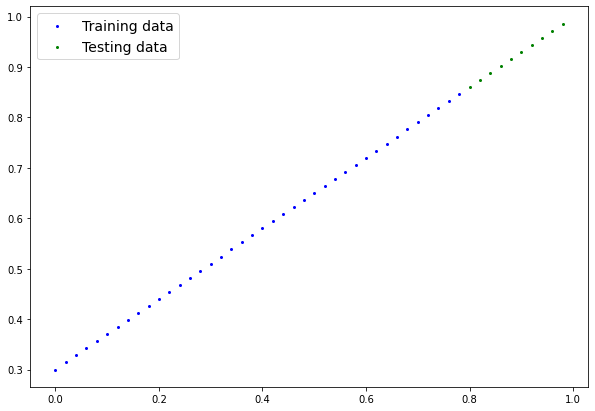

In [59]:
plot_predictions()

## 2. Building the model

What our model does:
* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

It does this through 2 main algorithms:
1. Gradient descent
2. Backpropagation

In [60]:
from torch import nn

# Create a linear regression model class
class LinearRegressionModel(nn.Module): # Almost everything in PyTorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    # torch.randn() returns a tensor filled with random numbers
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True, # allows gradient descent, also true by default
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, 
                                         requires_grad=True,
                                         dtype=torch.float))
    
    # Forward method to define the computation in the mode
  def forward(self, x: torch.Tensor) -> torch.Tensor: # x is the input data
    return self.weights * x + self.bias # linear regression formula

### PyTorch model building essentials

* torch.nn - contains all of the buildings for computational graphs (neural networks)
* torch.nn.Parameter - what parameters the model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - the base class for neural network modules, if you subclass it. you should overwrite forward()
* def forward(): All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation
* torch.optim - this is where the optimizers in PyTorch live, they will help with gradient descent

In [61]:
torch.randn(1)

tensor([0.3367])

### Checking the contents of our PyTorch model

In [62]:
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Checking the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [63]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [64]:
weight, bias

(0.7, 0.3)

### Making predictions using `torch.inference_mode()`

In [65]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [66]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

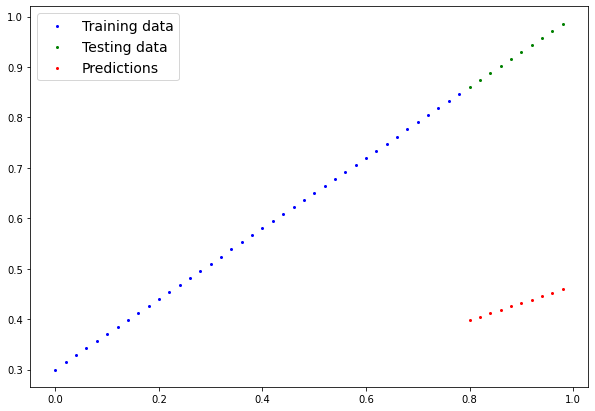

In [67]:
plot_predictions(predictions=y_preds)

## 3. Train Model

One way to measue how wrong your models predictions are is to use a loss (cost) functions.

Things we need to train:

* **Loss Function:** A function to measue how wrong your model's predictions are to the ideal outputs.

* **Optimizer:** Takes into account the loss of a model and adjust the model's parameters (e.g. weight & bias) to improve the loss function

And specifically for PyTorch we need:
- A training loop
- A testing loop

In [68]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [69]:
# Checking our models parameters (parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [70]:
# Setup a loss functin
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # lr: learning rate

### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:

0. Loop through the data
1. Forward pass (this involves data through our model's `forward()` functions) to make predictions - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with resptect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [71]:
torch.manual_seed(42)

# An epoch is a loop through the data (this is a hyperparameter beacuse we'set it ourselves)
epochs = 100

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

### Training
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradents to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)
  print(f"Loss: {loss}")

  # 3. Optimzer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Set the opitimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will accumulate the loop. So we have to zero them above in step 3 for the next iteration of the loop

  ### Testing
  model_0.eval() # turns off different settings in the model not deeded for evaluation/testing (dropout/batch norm layers)
  with torch.inference_mode(): # turns off gradient tracking & a couple more things behind
    # 1. Forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)
    
  # Print whats happening
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

  # Print out model state_dict()
  print(model_0.state_dict())

Loss: 0.31288138031959534
Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Loss: 0.3013603389263153
OrderedDict([('weights', tensor([0.3445])), ('bias', tensor([0.1488]))])
Loss: 0.28983935713768005
OrderedDict([('weights', tensor([0.3484])), ('bias', tensor([0.1588]))])
Loss: 0.2783183455467224
OrderedDict([('weights', tensor([0.3523])), ('bias', tensor([0.1688]))])
Loss: 0.26679736375808716
OrderedDict([('weights', tensor([0.3562])), ('bias', tensor([0.1788]))])
Loss: 0.2552763521671295
OrderedDict([('weights', tensor([0.3601])), ('bias', tensor([0.1888]))])
Loss: 0.24375534057617188
OrderedDict([('weights', tensor([0.3640])), ('bias', tensor([0.1988]))])
Loss: 0.23223432898521423
OrderedDict([('weights', tensor([0.3679])), ('bias', tensor([0.2088]))])
Loss: 0.22071333229541779
OrderedDict([('weights', tensor([0.3718])), ('bias', tensor([0.2188]))])
Loss: 0.20919232070446014
OrderedDict([('w

In [76]:
loss_values, test_loss_values

([tensor(0.3129, grad_fn=<L1LossBackward0>),
  tensor(0.1977, grad_fn=<L1LossBackward0>),
  tensor(0.0891, grad_fn=<L1LossBackward0>),
  tensor(0.0531, grad_fn=<L1LossBackward0>),
  tensor(0.0454, grad_fn=<L1LossBackward0>),
  tensor(0.0417, grad_fn=<L1LossBackward0>),
  tensor(0.0382, grad_fn=<L1LossBackward0>),
  tensor(0.0348, grad_fn=<L1LossBackward0>),
  tensor(0.0313, grad_fn=<L1LossBackward0>),
  tensor(0.0279, grad_fn=<L1LossBackward0>)],
 [tensor(0.4811),
  tensor(0.3464),
  tensor(0.2173),
  tensor(0.1446),
  tensor(0.1136),
  tensor(0.0992),
  tensor(0.0889),
  tensor(0.0806),
  tensor(0.0723),
  tensor(0.0647)])

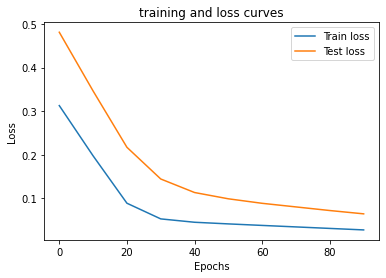

In [79]:
import numpy as np
loss_values_arr = np.array(torch.tensor(loss_values).numpy())
test_loss_values_arr = np.array(torch.tensor(test_loss_values).numpy())

# Plot the loss curves
plt.plot(epoch_count, loss_values_arr, label="Train loss")
plt.plot(epoch_count, test_loss_values_arr, label="Test loss")
plt.title("training and loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [72]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

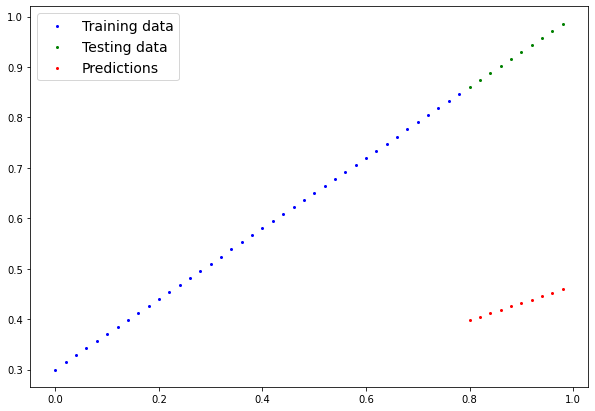

In [73]:
plot_predictions(predictions=y_preds);

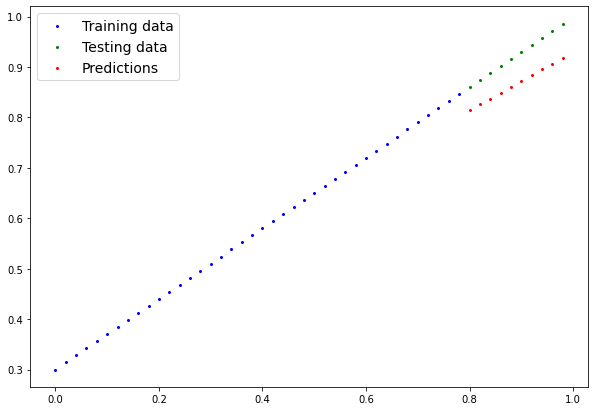

In [74]:
plot_predictions(predictions=y_preds_new);

## Saving a model in PyTorch

3 main methods for saving and loading models in PyTorch.

1. `torch.save()` - allows you to save a PyTorch object in Python's in pickle format
2. `torch.load()` - allows you to load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allows you to load a model's saved state dictionary

In [81]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH) 

Saving model to: models/01_pytorch_workflow_model_1.pth


In [82]:
# Loading a saved PyTorch model

# Instantiate a fresh instance of LinearRegressionModelV2
loaded_model_0 = LinearRegressionModel()

# Load model state dict 
loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [83]:
# Evaluate loaded model
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_0_preds = loaded_model_0(X_test)
loaded_model_0_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

In [84]:
y_preds_new == loaded_model_0_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## Putting it all together

In [1]:
# Import PyTorch
import torch
from torch import nn
import matplotlib.pyplot as plt

Create device-agnostic code.

This means if we got access to a GPU, code will use it

In [2]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [3]:
!nvidia-smi

Tue Oct  4 16:50:37 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8     9W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Data

In [4]:
# Create some data using the linear regression formula of y = weight * features + bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze we'll have an error
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [5]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

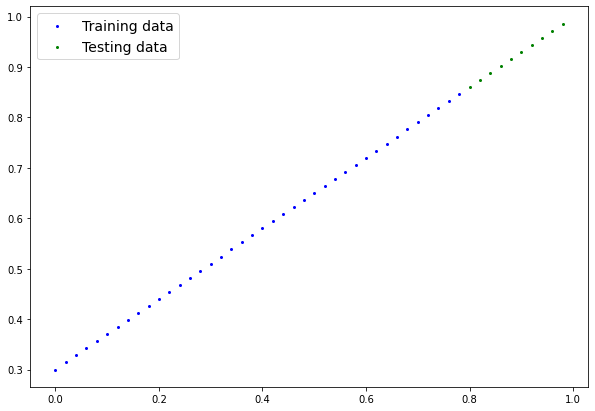

In [7]:
# Plot the data
plot_predictions(X_train, y_train, X_test, y_test)

## Building a PyTorch linear model

In [10]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)
    
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)
  
# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [11]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [12]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [13]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8300], device='cuda:0'))])

### Training

For training we need:
- Loss function
- Optimizer
- Training loop
- Testing loop

In [19]:
# Setup the loss function
loss_fn = nn.L1Loss() # same as MAE

# Setup the optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

# Let's write a training loop
epochs = 100

# Put data on the target device (device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

# 0. Loop through the data
for epoch in range(epochs):
  model_1.train()

  # 1. Forward pass
  y_pred = model_1(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing 
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  # Print what's hapenning
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.5321359634399414 | Test loss: 0.5470342636108398
Epoch: 10 | Loss: 0.4169261157512665 | Test loss: 0.4123244285583496
Epoch: 20 | Loss: 0.3017162084579468 | Test loss: 0.2776145935058594
Epoch: 30 | Loss: 0.18650634586811066 | Test loss: 0.14290474355220795
Epoch: 40 | Loss: 0.07129647582769394 | Test loss: 0.008412850089371204
Epoch: 50 | Loss: 0.022868333384394646 | Test loss: 0.04911517724394798
Epoch: 60 | Loss: 0.019271593540906906 | Test loss: 0.044285982847213745
Epoch: 70 | Loss: 0.01583278924226761 | Test loss: 0.03601343557238579
Epoch: 80 | Loss: 0.01240016520023346 | Test loss: 0.02842777408659458
Epoch: 90 | Loss: 0.008967976085841656 | Test loss: 0.02015523985028267


In [20]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6725]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3115], device='cuda:0'))])

### Making and evaluating predictions

In [21]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.8495],
        [0.8629],
        [0.8764],
        [0.8898],
        [0.9033],
        [0.9167],
        [0.9302],
        [0.9436],
        [0.9571],
        [0.9705]], device='cuda:0')

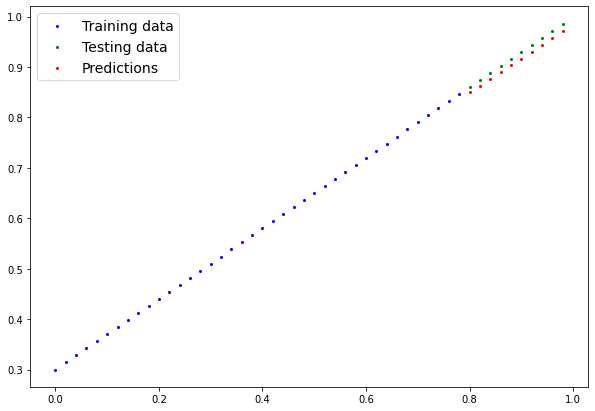

In [23]:
plot_predictions(predictions=y_preds.cpu())

## Saving and loading a trained model

In [25]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving the model to :{MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving the model to :models/01_pytorch_workflow_model_1.pth


In [26]:
# Load a model

# Create a new instance of linear regression model V2
loaded_model_1 = LinearRegressionModelV2()

# Load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to the device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [28]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [29]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6725]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3115], device='cuda:0'))])

In [30]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)

y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')